# 1. Introduction

As my 2nd data analytics work, I've decided to analyse Newcastle United Football Club's 21/22 Premier League Season. But with a twist.

Founded in 1892, this club based in Newcastle upon Tyne is one of the most historic in English professional football, with several accomplishments in its history such as 4 First Division titles, 6 FA Cups, or outrigh winner of the 1st edition of the UEFA Intertoto Cup. However, in recent decades, the Newcastle United has experienced lows and highs, getting relegated twice in the last 15 years.

In the 2021/2022, the season started the worst way possible: the first win only appeared in the beginning of December at the 15th matchday; and Steve Bruce left the club after just 8 games. Nevertheless, on 7 October 2021, the club was club to a new consortium for a reported £305 million, making them the richest football club in the world. The consortium was made up of Saudi Arabia's Public Investment Fund, RB Sports & Media and PCP Capital Partners. On 8 November 2021, Eddie Howe, former Bournemouth FC head coach, was appointed as Bruce's replacement. Howe guided the club to an 11th place finish after a run of 12 wins in their final 18 games, and became the first team in Premier League history to avoid relegation after failing to win any of their first 14 games.

In this study, I will guide you through hypothetical situations, a series of What If's. Most of the analysis was done using linear regressions, and explanations will be given throughout the project. All data in the league table were provided by https://understat.com/, where the specifications for each case will be explained. All detailed individual data was taken from https://fbref.com/.

## 2. Import modules

Firstly, the most important thing when working with Python is to import the modules you need:

In [1]:
import os
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import imageio
import random
import seaborn as sns
%matplotlib inline

# I want that my dataframes show all the columns
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

# 3. Import the 21/22 Premier League Dataset

## 3.1 Import Newcastle United's Matchdays

Next, we'll import all NUFC's results from 21/22 season. First, I introduce the function "season_colored", where it colors the matchdays depending if they happened before (red) or after (red) the Arabi Financial Takeover:

In [2]:
def season_colored(row):
    value = row.loc['Matchday']
    if value < 8: 
        color = '#fad1d0' #Before Financial Takeover
    else:
        color = '#02f25e' #After Financial Takeover
    return ['background-color: {}'.format(color) for r in row]

With this, we can apply this to the desired Dataframe, as:

In [3]:
season = pd.read_csv("NUFC2122.csv")

season.style.apply(season_colored, axis = 1)

,Matchday,Date,Team,Home or Away,Opp Team,NUFC Score,Opp Score,Pos,Pld,W,D,L,G,GA,GD,Pts
0,1,15/08/2021,Newcastle,H,West Ham,2,4,15,1,0,0,1,2,4,-2,0
1,2,21/08/2021,Newcastle,A,Aston Villa,0,2,19,2,0,0,2,2,6,-4,0
2,3,28/08/2021,Newcastle,H,Southampton,2,2,15,3,0,1,2,4,8,-4,1
3,4,11/09/2021,Newcastle,A,Man Utd,1,4,19,4,0,1,3,5,12,-7,1
4,5,17/09/2021,Newcastle,H,Leeds,1,1,18,5,0,2,3,6,13,-7,2
5,6,25/09/2021,Newcastle,A,Watford,1,1,17,6,0,3,3,7,14,-7,3
6,7,02/10/2021,Newcastle,A,Wolves,1,2,19,7,0,3,4,8,16,-8,3
7,8,17/10/2021,Newcastle,H,Tottenham,2,3,19,8,0,3,5,10,19,-9,3
8,9,23/10/2021,Newcastle,A,Crystal Palace,1,1,19,9,0,4,5,11,20,-9,4
9,10,30/10/2021,Newcastle,H,Chelsea,0,3,19,10,0,4,6,11,23,-12,4


## 3.2 Evolution of NUFC's season

Next, we'll plot the evolution of NUFC's season in terms of Wins, Draws and Losses. Additionally, some relevant milestones of this sporting season were added, such as the Saudi Consurtium buying the club, Eddie Howe appointed as manager, Joelinton moving to the midfield, and Bruno Guimarães first game for The Magpies.

Text(0.5, 1.0, 'Newcastle United FC 2021/2022 Premier League')

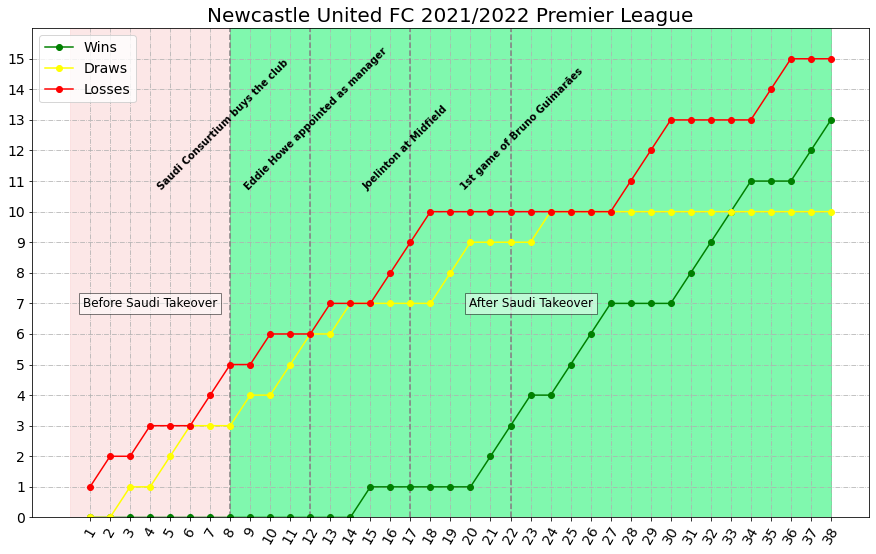

In [28]:
x = np.arange(1, 39, 1)
y = np.arange(0, 16, 1)

fig, ax = plt.subplots()

#Plotting Wins, Draws and Losses v/s Season
plt.rcParams['figure.figsize'] = [15, 9] #creates a graph of 15x9 inches

plt.plot(season['Matchday'], season['W'], 
         color = 'green', label = 'Wins', marker = 'o') #plot Wins v Season
plt.plot(season['Matchday'], season['D'], 
         color = 'yellow' , label = 'Draws', marker = 'o') #plot Draws v Season
plt.plot(season['Matchday'], season['L'], 
         color = 'red', label = 'Losses', marker = 'o') #plot Losses v Season

plt.ylim(0,16) #for setting y limits from 0 to 16.

plt.grid(which = 'major', axis = 'both', linestyle = '-.', 
         linewidth = 0.75) #plotting grid. See pyplot.grid in Google.

plt.xticks(x, rotation = 60,  
           fontsize = 14) #rotate x axis labels and increase font.
plt.yticks(y, 
           fontsize = 14) #increase yticks fontsize.

ax.axvspan(8, 0, color = '#fad1d0', alpha = 0.5)
ax.axvspan(8, 38, color = '#02f25e', alpha = 0.5)

plt.vlines(x = 8, ymin = 0,ymax = 16, color = '#808080', 
           linestyles = 'dashed') # Club was bought
plt.vlines(x = 12, ymin = 0,ymax = 16, color = '#808080', 
           linestyles = 'dashed') # Eddie Howe new manager
plt.vlines(x = 17, ymin = 0,ymax = 16, color = '#808080', 
           linestyles = 'dashed') # Joelinton at midfielder
plt.vlines(x = 22, ymin = 0,ymax = 16, color = '#808080', 
           linestyles = 'dashed') # Bruno Guimarães 1st game

plt.text(4, 7, 'Before Saudi Takeover', horizontalalignment = 'center', 
         verticalalignment = 'center', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))
plt.text(23, 7, 'After Saudi Takeover', horizontalalignment = 'center', 
         verticalalignment = 'center', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

fig.text(.24, .63, 'Saudi Consurtium buys the club', 
         size = 10, rotation = 45, weight = 'bold')
fig.text(.32, .63, 'Eddie Howe appointed as manager', 
         size = 10, rotation = 45, weight = 'bold')
fig.text(.43, .63, 'Joelinton at Midfield', 
         size = 10, rotation = 45, weight = 'bold')
fig.text(.52, .63, '1st game of Bruno Guimarães', 
         size = 10, rotation = 45, weight = 'bold')

plt.legend(fontsize = 14) #show labels as legend

plt.title('Newcastle United FC 2021/2022 Premier League', fontsize = 20)

## 3.3 Import 21/22 English Premier League

For this section, the final standings from the 21/22 EPL season was imported and a new colouring function was created. This function displays each position with its specific colour according to its meaning, such as the European places or the relegation zone:

In [5]:
def highlight_rows(row):
    value = row.loc['Pos']
    if value == 1:
        color = '#76aee3' # Champions 
    elif value == 2:
        color = '#7abfff'# Champions League
    elif value == 3:
        color = '#7abfff' # Champions League
    elif value == 4:
        color = '#7abfff' # Champions League
    elif value == 5:
        color = '#F1C062' # Europa League
    elif value == 6:
        color = '#F1C062' # Europa League
    elif value == 7:
        color = '#BAFFC9' # Conference League
    elif value == 18:
        color = '#FFB3BA' # Red - relegated
    elif value == 19:
        color = '#FFB3BA' # Red - relegated
    elif value == 20:
        color = '#FFB3BA' # Red - relegated
    else:
        color = '' # The rest
    return ['background-color: {}'.format(color) for r in row]

Importing the table with the specific color:

In [6]:
EPL2122 = pd.read_csv('EPL21_22.csv')

EPL2122.style.apply(highlight_rows, axis = 1)

,Pos,Team,PLD,W,D,L,GF,GA,GD,Pts
0,1,Man City,38,29,6,3,99,26,73,93
1,2,Liverpool,38,28,8,2,94,26,68,92
2,3,Chelsea,38,21,11,6,76,33,43,74
3,4,Tottenham,38,22,5,11,69,40,29,71
4,5,Arsenal,38,22,3,13,61,48,13,69
5,6,Man Utd,38,16,10,12,57,57,0,58
6,7,West Ham,38,16,8,14,60,51,9,56
7,8,Leicester City,38,14,10,14,62,59,3,52
8,9,Brighton,38,12,15,11,42,44,-2,51
9,10,Wolves,38,15,6,17,38,43,-5,51


# 4. What If?

Before creating hypothetical scenarios, first, let's remove Newcastle United from the 21/22 EPL table - it'll be helpful.

In [7]:
EPL2122_1 = EPL2122.drop(EPL2122.index[10])

EPL2122_NoNUFC = EPL2122_1.drop(columns='Pos')

EPL2122_NoNUFC

,Team,PLD,W,D,L,GF,GA,GD,Pts
0,Man City,38,29,6,3,99,26,73,93
1,Liverpool,38,28,8,2,94,26,68,92
2,Chelsea,38,21,11,6,76,33,43,74
3,Tottenham,38,22,5,11,69,40,29,71
4,Arsenal,38,22,3,13,61,48,13,69
5,Man Utd,38,16,10,12,57,57,0,58
6,West Ham,38,16,8,14,60,51,9,56
7,Leicester City,38,14,10,14,62,59,3,52
8,Brighton,38,12,15,11,42,44,-2,51
9,Wolves,38,15,6,17,38,43,-5,51


## 4.1 What if NUFC was never bought?

To answer this question, let's consider the table before the Saudi takeover. 

The club was bought on 7 October 2021, so, considering every game prior to this, we'll import the first 7 games of the season, until October 2nd:

In [8]:
before = pd.read_csv("NUFC2122_beforeTakeover.csv")

before.style.apply(highlight_rows, axis = 1)

,Pos,Team,Pld,W,D,L,G,GA,GD,Pts
0,1,Chelsea,7,5,1,1,15,3,12,16
1,2,Liverpool,7,4,3,0,17,6,11,15
2,3,Man City,7,4,2,1,14,3,11,14
3,4,Man Utd,7,4,2,1,14,6,8,14
4,5,Everton,7,4,2,1,13,8,5,14
5,6,Brighton,7,4,2,1,8,5,3,14
6,7,Brentford,7,3,3,1,10,6,4,12
7,8,Tottenham,7,4,0,3,6,10,-4,12
8,9,West Ham,7,3,2,2,14,10,4,11
9,10,Aston Villa,7,3,1,3,10,9,1,10


Considering that we're missing 31 games of the season, applying basic linear Algebra, let's predict the results for the rest of the season and print what NUFC would look like in the end:

In [9]:
before['Pld*'] = ((before['W'] + 31 * before['W']/before['Pld']) 
                 + (before['D'] + 31 * before['D']/before['Pld']) 
                 + (before['L'] + 31 * before['L']/before['Pld']))
        
before['W*'] = round(before['W'] + 
                     31 * before['W']/before['Pld'])

before['D*'] = round(before['D'] + 
                     31 * before['D']/before['Pld'])

before['L*'] = round(before['L'] + 
                     31 * before['L']/before['Pld'])

before['G*'] = round(before['G'] + 
                     31 * before['G']/before['Pld'])

before['GA*'] = round(before['GA'] + 
                      31 * before['GA']/before['Pld'])

before['GD*'] = round(before['G*'] - before['GA*'])

before['Pts*'] = round(before['Pts'] + 
                       31 * before['Pts']/before['Pld'])

NUFCbefore = before.loc[before['Team'] == 'Newcastle']

NUFCbefore[['Pos', 'Team','Pld*', 'W*', 'D*', 
            'L*', 'G*', 'GA*', 'GD*', 'Pts*']]

,Pos,Team,Pld*,W*,D*,L*,G*,GA*,GD*,Pts*
18,19,Newcastle,38.0,0.0,16.0,22.0,43.0,87.0,-44.0,16.0


In [10]:
BeforeNUFC = pd.DataFrame({'Team': ['Newcastle'], 
                        'PLD': [38], 
                        'W': [0], 
                        'D': [16], 
                        'L': [22], 
                        'GF':[43], 
                        'GA': [87], 
                        'GD': [-44], 
                        'Pts': [6]})

BeforeNUFC

,Team,PLD,W,D,L,GF,GA,GD,Pts
0,Newcastle,38,0,16,22,43,87,-44,6


Ouch, that's ugly! Picking this results, let's add them to the previous table which didn't include Newcastle United to predict their season without the Saudi Consurtium takeover:

In [11]:
table1 = pd.concat([EPL2122_NoNUFC, BeforeNUFC], ignore_index = True)

EPL_Before = table1.sort_values(["Pts", "GD"], ascending = False)

EPL_Before.insert(0, 'Pos',
                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                   11, 12, 13, 14, 15, 16, 17, 18, 19, 20], True)

EPL_Before.style.apply(highlight_rows, axis = 1)

,Pos,Team,PLD,W,D,L,GF,GA,GD,Pts
0,1,Man City,38,29,6,3,99,26,73,93
1,2,Liverpool,38,28,8,2,94,26,68,92
2,3,Chelsea,38,21,11,6,76,33,43,74
3,4,Tottenham,38,22,5,11,69,40,29,71
4,5,Arsenal,38,22,3,13,61,48,13,69
5,6,Man Utd,38,16,10,12,57,57,0,58
6,7,West Ham,38,16,8,14,60,51,9,56
7,8,Leicester City,38,14,10,14,62,59,3,52
8,9,Brighton,38,12,15,11,42,44,-2,51
9,10,Wolves,38,15,6,17,38,43,-5,51


Well... this season would be catastrophic - it would be the worst Premier League season by a team ever, in terms of total points, beating Derby County FC's 2007/2008 season by 5 points less, also being the first winless team in First Divisions' history.

## 4.2 What if NUFC was already bought?

This time, let's evaluate the results after the Takeover, after Matchday 7:

In [12]:
after = pd.read_csv("NUFC2122_afterTakeover.csv")

after.style.apply(highlight_rows, axis = 1)

,Pos,Team,Pld,W,D,L,G,GA,GD,Pts
0,1,Man City,31,25,4,2,85,23,62,79
1,2,Liverpool,31,24,5,2,77,20,57,77
2,3,Tottenham,31,18,5,8,63,30,33,59
3,4,Arsenal,31,19,2,10,56,38,18,59
4,5,Chelsea,31,16,10,5,61,30,31,58
5,6,Newcastle,31,13,7,11,36,46,-10,46
6,7,West Ham,31,13,6,12,46,41,5,45
7,8,Leicester,31,12,8,11,53,47,6,44
8,9,Man Utd,31,12,8,11,43,51,-8,44
9,10,Wolves,31,12,6,13,33,37,-4,42


Since there are only 7 games left to play, applying a linear regression, let's predict the results for the rest of the season and print what NUFC would look like in the end:

In [13]:
after['Pld*'] = ((after['W'] + 7 * after['W'] / after['Pld']) 
                 + (after['D'] + 7 * after['D'] / after['Pld']) 
                 + (after['L'] + 7 * after['L'] / after['Pld']))
        
after['W*'] = round(after['W'] + 
                    7 * after['W'] / after['Pld'])

after['D*'] = round(after['D'] + 
                    7 * after['D'] / after['Pld'])

after['L*'] = round(after['L'] + 
                    7 * after['L'] / after['Pld'])

after['G*'] = round(after['G'] + 
                    7 * after['G'] / after['Pld'])

after['GA*'] = round(after['GA'] + 
                     7 * after['GA'] / after['Pld'])

after['GD*'] = round(after['G*'] - after['GA*'])

after['Pts*'] = round(after['Pts'] + 
                      7 * after['Pts'] / after['Pld'])

NUFCafter = after.loc[after['Team'] == 'Newcastle']

NUFCafter[['Pos', 'Team','Pld*', 'W*', 'D*', 
           'L*', 'G*', 'GA*', 'GD*', 'Pts*']]

,Pos,Team,Pld*,W*,D*,L*,G*,GA*,GD*,Pts*
5,6,Newcastle,38.0,16.0,9.0,13.0,44.0,56.0,-12.0,56.0


In [14]:
AfterNUFC = pd.DataFrame({'Team': ['Newcastle'], 
                        'PLD': [38], 
                        'W': [16], 
                        'D': [9], 
                        'L': [13], 
                        'GF':[44], 
                        'GA': [56], 
                        'GD': [-12], 
                        'Pts': [56]})

AfterNUFC

,Team,PLD,W,D,L,GF,GA,GD,Pts
0,Newcastle,38,16,9,13,44,56,-12,56


That's definitely an improvement to our previous scenario! But how would that look like in the real table?

In [15]:
table2 = pd.concat([EPL2122_NoNUFC, AfterNUFC],ignore_index = True)

EPL_After = table2.sort_values(["Pts", "GD"], ascending = False)

EPL_After.insert(0, 'Pos', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                          11, 12, 13, 14, 15, 16, 17, 18, 19, 20], True)

EPL_After.style.apply(highlight_rows, axis = 1)

,Pos,Team,PLD,W,D,L,GF,GA,GD,Pts
0,1,Man City,38,29,6,3,99,26,73,93
1,2,Liverpool,38,28,8,2,94,26,68,92
2,3,Chelsea,38,21,11,6,76,33,43,74
3,4,Tottenham,38,22,5,11,69,40,29,71
4,5,Arsenal,38,22,3,13,61,48,13,69
5,6,Man Utd,38,16,10,12,57,57,0,58
6,7,West Ham,38,16,8,14,60,51,9,56
19,8,Newcastle,38,16,9,13,44,56,-12,56
7,9,Leicester City,38,14,10,14,62,59,3,52
8,10,Brighton,38,12,15,11,42,44,-2,51


The Saudi Financial Takeover has brought stability to the club, which was displayed in terms of results. As you can see, Newcastle almost made to European football - they tied with West Ham in points, but lost in terms of goal difference. Also, this would mean an improvement to their standing compared to what really happened!

## 4.3 What if Joelinton always played in midfield?

Joelinton was definitely one of the surprises of the season. On December 16, a previous below-average attacker started as a left-ish central midfielder in 4-5-1 lineup. Since then, Joelinton transformed into a brilliant box-to-box midfielder. 

Let's check his stats from the last 365 days. To do that, a new colouring function was created to highlight below or above average percentiles:

In [16]:
def percentile(row):
    value = row.loc['Percentile']
    if value >= 75:
        #Percentile above or equal to 75%
        color = '#90EE90'
    elif value <= 25:
        #Percentile below or equal to 25%
        color = '#FAA0A0'
    else:
        color = ''
    return ['background-color: {}'.format(color) for r in row]

In [17]:
JoelintonVSMid = pd.read_csv("JoelintonVSmidfielders.csv")

JoelintonVSMid.style.apply(percentile, axis = 1)

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.14,83
1,npxG,0.14,90
2,Shots Total,1.62,89
3,Assists,0.04,29
4,xA,0.06,43
5,npxG+xA,0.21,75
6,Shot-Creating Actions,2.25,63
7,Passes Attempted,33.11,6
8,Pass Completion %,79.2%,26
9,Progressive Passes,2.36,10


In [18]:
JoelintonVSAttmidWingers = pd.read_csv("JoelintonVSattmidWingers.csv")

JoelintonVSAttmidWingers.style.apply(percentile, axis = 1)

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.14,26
1,npxG,0.14,19
2,Shots Total,1.62,25
3,Assists,0.04,5
4,xA,0.06,4
5,npxG+xA,0.21,7
6,Shot-Creating Actions,2.25,11
7,Passes Attempted,33.11,32
8,Pass Completion %,79.2%,68
9,Progressive Passes,2.36,29


Surprisingly enough, he has become one of the best ball retrievers in the top 5 leagues, as well as being a pressing and progressive midfielder. 

But what kind of impact has this change had on the team's results? Repeating previous steps, let's analyse and predict Newcastle's season if Joelinton was a midfielder from the start of the season: 

In [19]:
JoelCM = pd.read_csv("NUFC2122_JoelintonCM.csv")

JoelCM.style.apply(highlight_rows, axis = 1)

,Pos,Team,Pld,W,D,L,G,GA,GD,Pts
0,1,Liverpool,22,17,4,1,49,14,35,55
1,2,Man City,21,16,4,1,59,17,42,52
2,3,Tottenham,24,14,4,6,53,23,30,46
3,4,Arsenal,21,13,1,7,38,26,12,40
4,5,Newcastle,22,12,3,7,27,28,-1,39
5,6,Chelsea,22,10,8,4,38,22,16,38
6,7,Brighton,22,8,7,7,28,27,1,31
7,8,Man Utd,22,8,7,7,31,33,-2,31
8,9,Leicester,22,8,6,8,35,32,3,30
9,10,Crystal Palace,21,7,7,7,26,22,4,28


In [20]:
JoelCM['Pld*'] = ((JoelCM['W'] + 16 * JoelCM['W'] / JoelCM['Pld']) 
                 + (JoelCM['D'] + 16 * JoelCM['D'] / JoelCM['Pld']) 
                 + (JoelCM['L'] + 16 * JoelCM['L'] / JoelCM['Pld']))
        
JoelCM['W*'] = round(JoelCM['W'] + 
                     16 * JoelCM['W'] / JoelCM['Pld'])

JoelCM['D*'] = round(JoelCM['D'] + 
                     16 * JoelCM['D'] / JoelCM['Pld'])

JoelCM['L*'] = round(JoelCM['L'] + 
                     16 * JoelCM['L'] / JoelCM['Pld'])

JoelCM['G*'] = round(JoelCM['G'] + 
                     16 * JoelCM['G'] / JoelCM['Pld'])

JoelCM['GA*'] = round(JoelCM['GA'] + 
                      16 * JoelCM['GA'] / JoelCM['Pld'])

JoelCM['GD*'] = round(JoelCM['G*'] - JoelCM['GA*'])

JoelCM['Pts*'] = round(JoelCM['Pts'] + 
                       16 * JoelCM['Pts'] / JoelCM['Pld'])

NUFCJoelCM = JoelCM.loc[JoelCM['Team'] == 'Newcastle']

NUFCJoelCM[['Pos', 'Team','Pld*', 'W*', 'D*', 
            'L*', 'G*', 'GA*', 'GD*', 'Pts*']]

,Pos,Team,Pld*,W*,D*,L*,G*,GA*,GD*,Pts*
4,5,Newcastle,38.0,21.0,5.0,12.0,47.0,48.0,-1.0,67.0


In [21]:
JoelCMNUFC = pd.DataFrame({'Team': ['Newcastle'], 
                        'PLD': [38], 
                        'W': [21], 
                        'D': [5], 
                        'L': [12], 
                        'GF':[47], 
                        'GA': [48], 
                        'GD': [-1], 
                        'Pts': [67]})

JoelCMNUFC

,Team,PLD,W,D,L,GF,GA,GD,Pts
0,Newcastle,38,21,5,12,47,48,-1,67


In [22]:
table3 = pd.concat([EPL2122_NoNUFC, JoelCMNUFC],ignore_index = True)

EPL_JoelCM = table3.sort_values(["Pts", "GD"], ascending = False)

EPL_JoelCM.insert(0, 'Pos', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                             11, 12, 13, 14, 15, 16, 17, 18, 19, 20], True)

EPL_JoelCM.style.apply(highlight_rows, axis = 1)

,Pos,Team,PLD,W,D,L,GF,GA,GD,Pts
0,1,Man City,38,29,6,3,99,26,73,93
1,2,Liverpool,38,28,8,2,94,26,68,92
2,3,Chelsea,38,21,11,6,76,33,43,74
3,4,Tottenham,38,22,5,11,69,40,29,71
4,5,Arsenal,38,22,3,13,61,48,13,69
19,6,Newcastle,38,21,5,12,47,48,-1,67
5,7,Man Utd,38,16,10,12,57,57,0,58
6,8,West Ham,38,16,8,14,60,51,9,56
7,9,Leicester City,38,14,10,14,62,59,3,52
8,10,Brighton,38,12,15,11,42,44,-2,51


It seems that this change would favorably impact The Magpies season - Not only they would improve their final standing, qualifying directly for the Europa League, but also they would be 5 points short of a Champions League spot. Also, they would finish ahead of Manchester United, outperforming them by nine points and relegating them to the Conference League.

## 4.4 What if Bruno Guimarães was bought earlier?

Another important piece to the NUFC system is the Brazilian defensive midfielder Bruno Guimarães. Bought for £40M to Olympique Lyonnais on January 30, Guimarães is one of the most complete midfielders in Europe, as shown in his stats and respective percentiles:

In [23]:
BrunoGVSMid = pd.read_csv("BrunoGVSmidfielders.csv")

BrunoGVSMid.style.apply(percentile, axis = 1)

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.16,86
1,npxG,0.12,82
2,Shots Total,1.05,53
3,Assists,0.19,90
4,xA,0.19,95
5,npxG+xA,0.31,93
6,Shot-Creating Actions,3.07,88
7,Passes Attempted,64.10,86
8,Pass Completion %,86.9%,78
9,Progressive Passes,5.95,90


Consequently, it was obvious that a player of this calibre would have a positive influence on Newcastle's remaining season. But how big is that impact? Again, repeating previous steps, let's analyse and predict The Magpies' season if Guimarães was bought before the season started:

In [24]:
BrunoG = pd.read_csv("NUFC2122_BrunoG.csv")

BrunoG.style.apply(highlight_rows, axis = 1)

,Pos,Team,Pld,W,D,L,G,GA,GD,Pts
0,1,Liverpool,16,14,2,0,36,7,29,44
1,2,Man City,15,11,3,1,44,12,32,36
2,3,Tottenham,18,11,2,5,43,16,27,35
3,4,Newcastle,17,11,1,5,23,19,4,34
4,5,Arsenal,17,11,0,6,28,23,5,33
5,6,Chelsea,14,8,3,3,28,15,13,27
6,7,Leicester,18,7,5,6,28,22,6,26
7,8,Crystal Palace,16,6,6,4,19,12,7,24
8,9,Brentford,15,7,2,6,22,18,4,23
9,10,Burnley,19,6,4,9,18,26,-8,22


In [25]:
BrunoG['Pld*'] = ((BrunoG['W'] + 21 * BrunoG['W']/BrunoG['Pld']) 
                 + (BrunoG['D'] + 21 * BrunoG['D']/BrunoG['Pld']) 
                 + (BrunoG['L'] + 21 * BrunoG['L']/BrunoG['Pld']))
        
BrunoG['W*'] = round(BrunoG['W'] + 
                     21 * BrunoG['W']/BrunoG['Pld'])

BrunoG['D*'] = round(BrunoG['D'] + 
                     21 * BrunoG['D']/BrunoG['Pld'])

BrunoG['L*'] = round(BrunoG['L'] + 
                     21 * BrunoG['L']/BrunoG['Pld'])

BrunoG['G*'] = round(BrunoG['G'] + 
                     21 * BrunoG['G']/BrunoG['Pld'])

BrunoG['GA*'] = round(BrunoG['GA'] + 
                      21 * BrunoG['GA']/BrunoG['Pld'])

BrunoG['GD*'] = round(BrunoG['G*'] - BrunoG['GA*'])

BrunoG['Pts*'] = round(BrunoG['Pts'] + 
                       21 * BrunoG['Pts']/BrunoG['Pld'])

NUFCBrunoG = BrunoG.loc[BrunoG['Team'] == 'Newcastle']

NUFCBrunoG[['Pos', 'Team','Pld*', 'W*', 'D*', 
            'L*', 'G*', 'GA*', 'GD*', 'Pts*']]


,Pos,Team,Pld*,W*,D*,L*,G*,GA*,GD*,Pts*
3,4,Newcastle,38.0,25.0,2.0,11.0,51.0,42.0,9.0,76.0


In [26]:
BrunoGNUFC = pd.DataFrame({'Team': ['Newcastle'], 
                        'PLD': [38], 
                        'W': [25], 
                        'D': [2], 
                        'L': [11], 
                        'GF':[51], 
                        'GA': [42], 
                        'GD': [9], 
                        'Pts': [76]})

BrunoGNUFC

,Team,PLD,W,D,L,GF,GA,GD,Pts
0,Newcastle,38,25,2,11,51,42,9,76


In [27]:
table4 = pd.concat([EPL2122_NoNUFC, BrunoGNUFC],ignore_index = True)

EPL_BrunoG = table4.sort_values(["Pts", "GD"], ascending = False)

EPL_BrunoG.insert(0, 'Pos',[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                            11, 12, 13, 14, 15, 16, 17, 18, 19, 20], True)

EPL_BrunoG.style.apply(highlight_rows, axis = 1)

,Pos,Team,PLD,W,D,L,GF,GA,GD,Pts
0,1,Man City,38,29,6,3,99,26,73,93
1,2,Liverpool,38,28,8,2,94,26,68,92
19,3,Newcastle,38,25,2,11,51,42,9,76
2,4,Chelsea,38,21,11,6,76,33,43,74
3,5,Tottenham,38,22,5,11,69,40,29,71
4,6,Arsenal,38,22,3,13,61,48,13,69
5,7,Man Utd,38,16,10,12,57,57,0,58
6,8,West Ham,38,16,8,14,60,51,9,56
7,9,Leicester City,38,14,10,14,62,59,3,52
8,10,Brighton,38,12,15,11,42,44,-2,51


Wow, incredible! Counting every parameter - Saudi management, Eddie Howe as a manager, Joelinton as a midfielder, Bruno Guimarães as a Magpie since the beginning of EPL 21/22-, NUFC would finish in a splendid 3rd place, guaranteeing a Champions League spot, above 4 of the Big 6, only below to Liverpool and Man City!

# 5. Conclusion

In summary, Newcastle United FC season was one of the most impressive by a mid-table team ever! After being winless for the first 14 games, the team has turned around its season due to a number of factors, all influenced by the Financial Takeover of the Saudi Consurtium. 

Considering different variables, we could analyse and predict NUFC season via the linear regressions. However this predictive model is not the most reliable, since we only considered the results in terms of Wins, Draws or Losses, not taking consideration the match-ups and how those would affect the opposing teams. Also, this model does not consider external factors to the statistics on the score sheet, such as home and away matches, the occasion of the match, or more inspired games by players or teams. 

Nevertheless, I was invested in this work as I explored different and new Python/Pandas tools. I believe that this study improved my skills not only as a Football Analyst, but also as a Data Analyst.